<a href="https://colab.research.google.com/github/fatimaAfzaal/Multiple-Ensemble-models-Diabetes-Prediction-Project-/blob/main/MultipleEnsembleModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Project Using Hybrid models


## 1. 下载及导入所需要的包

In [1]:
# pip install catboost


In [2]:
import pandas as pd                                                        #for data manipulation
import numpy as np                                                         #for numerical operations
from matplotlib import pyplot as plt                                       #for visualization
import seaborn as sns                                                      #for visualization
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier                        #for using Random forest Classifier algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score                                 #for accouracy


## 2. 导入训练集和测试集

In [3]:

# Import training dataset / 导入训练集
train_df = pd.read_csv("C:/Users/dell/Desktop/final_project/data/train_data.csv")
Y_train = train_df['diabetes']  # Target variable for training dataset / 训练集目标变量
X_train = train_df.iloc[:, :-1]  # Select all rows and all columns except the last one / 选择所有行和除了最后一列以外的所有列

# Import testing dataset / 导入测试集
test_df = pd.read_csv("C:/Users/dell/Desktop/final_project/data/test_data.csv")
Y_test = test_df['diabetes']  # Target variable for testing dataset / 测试集目标变量
X_test = test_df.iloc[:, :-1]  # Select all rows and all columns except the last one / 选择所有行和除了最后一列以外的所有列

# Output the result / 输出结果
print("Training dataset features:", X_train.shape)  # 训练集特征
print("Testing dataset features:", X_test.shape)  # 测试集特征
print("Training dataset target:", Y_train.shape)  # 训练集目标
print("Testing dataset target:", Y_test.shape)  # 测试集目标


Training dataset features: (74048, 15)
Testing dataset features: (18513, 15)
Training dataset target: (74048,)
Testing dataset target: (18513,)


In [4]:
# 假设 X_train 和 X_test 是已经划分好的训练集和测试集（DataFrame格式）

# 保存列名
columns = X_train.columns

# 初始化StandardScaler
scaler = StandardScaler()

# 对训练集进行标准化（fit + transform）
X_train = scaler.fit_transform(X_train)

# 对测试集进行标准化（仅 transform，防止数据泄漏）
X_test = scaler.transform(X_test)

# 转换回DataFrame，并指定列名
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

# 输出标准化后的数据形状
print("Standardized Training dataset features:", X_train.shape)
print("Standardized Testing dataset features:", X_test.shape)

# 打印标准化后的训练集和测试集的前五行
print("\nStandardized Training Data (First 5 rows):")
print(X_train.head())

print("\nStandardized Testing Data (First 5 rows):")
print(X_test.head())

Standardized Training dataset features: (74048, 15)
Standardized Testing dataset features: (18513, 15)

Standardized Training Data (First 5 rows):
        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  0.679474     -0.289059      -0.205737 -1.922380     0.610237   
1  0.501401     -0.289059      -0.205737  0.170888    -1.996087   
2 -1.679986     -0.289059      -0.205737 -2.006818    -0.692925   
3  1.302728     -0.289059      -0.205737  0.170888     0.610237   
4  0.323329     -0.289059      -0.205737  2.205246     0.710480   

   blood_glucose_level  diabetes  gender_Female  gender_Male  gender_Other  \
0             1.851414 -0.310625      -1.187544     1.187973     -0.013251   
1             0.282064 -0.310625       0.842074    -0.841770     -0.013251   
2            -1.429954 -0.310625       0.842074    -0.841770     -0.013251   
3             1.851414 -0.310625      -1.187544     1.187973     -0.013251   
4            -1.001949 -0.310625       0.842074    -0.841770

In [9]:
# 检查是否有重复行
duplicates = X_train.index.isin(X_test.index)
print("重复样本数量:", sum(duplicates))

重复样本数量: 18513


# 模型的选择与训练
Firstly we will select the right algorithm according to our requirement and then we will train data on model

In [8]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# 定义所有模型的配置（名称、模型类、参数）
model_configs = [
    {
        'name': 'Random Forest',
        'class': RandomForestClassifier,
        'params': {'n_estimators': 50, 'random_state': 42}
    },
    {
        'name': 'AdaBoost',
        'class': AdaBoostClassifier,
        'params': {'n_estimators': 50, 'random_state': 42}
    },
    {
        'name': 'Gradient Boosting',
        'class': GradientBoostingClassifier,
        'params': {'n_estimators': 50, 'random_state': 42}
    },
    {
        'name': 'Bagging',
        'class': BaggingClassifier,
        'params': {'n_estimators': 50, 'random_state': 42}
    },
    {
        'name': 'Extra Trees',
        'class': ExtraTreesClassifier,
        'params': {'n_estimators': 50, 'random_state': 42}
    },
    {
        'name': 'XGBoost',
        'class': XGBClassifier,
        'params': {'n_estimators': 50, 'random_state': 42}
    },
    {
        'name': 'Neural Network',
        'class': MLPClassifier,
        'params': {'hidden_layer_sizes': (100, 50), 'max_iter': 200, 'random_state': 42}
    },
    {
        'name': 'KNN',
        'class': KNeighborsClassifier,
        'params': {'n_neighbors': 6}
    },
    {
        'name': 'Passive Aggressive',
        'class': PassiveAggressiveClassifier,
        'params': {'C': 1.0, 'random_state': 42}
    },
    {
        'name': 'CatBoost',
        'class': CatBoostClassifier,
        'params': {'iterations': 50, 'learning_rate': 0.1, 'depth': 6, 'random_state': 42, 'verbose': 0}
    }
]

# 统一训练并评估每个模型
for config in model_configs:
    model_name = config['name']
    model = config['class'](**config['params'])
    
    # 训练模型
    model.fit(X_train, Y_train)
    
    # 预测测试集
    Y_pred = model.predict(X_test)
    
    # 计算指标
    acc = accuracy_score(Y_test, Y_pred)
    pre = precision_score(Y_test, Y_pred, average='weighted')  # 多分类使用 weighted
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    
    # 打印结果
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"F1-Score: {f1:.4f}")


=== Random Forest ===
Accuracy: 1.0000
Precision: 1.0000
F1-Score: 1.0000

=== AdaBoost ===
Accuracy: 1.0000
Precision: 1.0000
F1-Score: 1.0000

=== Gradient Boosting ===
Accuracy: 1.0000
Precision: 1.0000
F1-Score: 1.0000

=== Bagging ===
Accuracy: 1.0000
Precision: 1.0000
F1-Score: 1.0000

=== Extra Trees ===
Accuracy: 1.0000
Precision: 1.0000
F1-Score: 1.0000

=== XGBoost ===
Accuracy: 1.0000
Precision: 1.0000
F1-Score: 1.0000

=== Neural Network ===
Accuracy: 1.0000
Precision: 1.0000
F1-Score: 1.0000

=== KNN ===
Accuracy: 1.0000
Precision: 1.0000
F1-Score: 1.0000

=== Passive Aggressive ===
Accuracy: 1.0000
Precision: 1.0000
F1-Score: 1.0000

=== CatBoost ===
Accuracy: 1.0000
Precision: 1.0000
F1-Score: 1.0000


In [ ]:
# List of models and their names
models = {
    'random_forest': rf,
    'adaboost': ab,
    'gradient_boosting': gb,
    'bagging': bagging,
    'extra_trees': extra_trees,
    'xgboost': xgboost,
    'neural_network': nn_model,
    'knn' :knn_model,
    'pa': pa_model,
    'catboost':catboost_model
}

# Save models
for model_name, model in models.items():
    dump(model, f'{model_name}_model.joblib')

# Load models
loaded_models = {}
for model_name in models.keys():
    loaded_models[model_name] = load(f'{model_name}_model.joblib')


## 使用grid search来搜索最佳超参数

In [ ]:
# 调参数
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, Y_train)
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

# AdaBoost
ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

ab_grid_search = GridSearchCV(AdaBoostClassifier(), ab_param_grid, cv=3, n_jobs=-1, verbose=2)
ab_grid_search.fit(X_train, Y_train)
print("Best parameters for AdaBoost:", ab_grid_search.best_params_)

# Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(), gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, Y_train)
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)

# Bagging
bagging_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bagging_grid_search = GridSearchCV(BaggingClassifier(), bagging_param_grid, cv=3, n_jobs=-1, verbose=2)
bagging_grid_search.fit(X_train, Y_train)
print("Best parameters for Bagging:", bagging_grid_search.best_params_)

# Extra Trees
extra_trees_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

extra_trees_grid_search = GridSearchCV(ExtraTreesClassifier(), extra_trees_param_grid, cv=3, n_jobs=-1, verbose=2)
extra_trees_grid_search.fit(X_train, Y_train)
print("Best parameters for Extra Trees:", extra_trees_grid_search.best_params_)

# XGBoost
xgboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
}

xgboost_grid_search = GridSearchCV(XGBClassifier(), xgboost_param_grid, cv=3, n_jobs=-1, verbose=2)
xgboost_grid_search.fit(X_train, Y_train)
print("Best parameters for XGBoost:", xgboost_grid_search.best_params_)

# Neural Network (MLP)
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

nn_grid_search = GridSearchCV(MLPClassifier(max_iter=1000), nn_param_grid, cv=3, n_jobs=-1, verbose=2)
nn_grid_search.fit(X_train, Y_train)
print("Best parameters for Neural Network:", nn_grid_search.best_params_)

# 定义超参数搜索空间 / Define hyperparameter search space
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10], 
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'leaf_size': [30, 40, 50],  
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

# 使用 GridSearchCV 进行超参数调优 / use gridsearch to tuning the hyperparameter   
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3, n_jobs=-1, verbose=2)
knn_grid_search.fit(X_train, Y_train)

# 1. PassiveAggressiveClassifier Hyperparameter Tuning
pa_param_grid = {
    'C': [0.1, 0.5, 1.0, 5.0],  # Regularization parameter
    'max_iter': [50, 100, 200],  # Maximum number of iterations
    'tol': [1e-4, 1e-3],  # Tolerance for stopping criteria
}

pa_grid_search = GridSearchCV(PassiveAggressiveClassifier(random_state=42), 
                              pa_param_grid, 
                              cv=3,  # 3-fold cross-validation
                              n_jobs=-1,  # Use all available CPUs
                              verbose=2)

pa_grid_search.fit(X_train, Y_train)

# 2. CatBoostClassifier Hyperparameter Tuning
catboost_param_grid = {
    'iterations': [100, 200],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [4, 6, 8],  # Depth of the trees
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization term
}

catboost_grid_search = GridSearchCV(CatBoostClassifier(random_state=42, verbose=0), 
                                    catboost_param_grid, 
                                    cv=3,  # 3-fold cross-validation
                                    n_jobs=-1,  # Use all available CPUs
                                    verbose=2)

catboost_grid_search.fit(X_train, Y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Bagging: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 100}
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Extra Trees: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Fitting 3 folds for each of 48 candidate

In [ ]:
# # 定义超参数搜索空间 / Define hyperparameter search space
# knn_param_grid = {
#     'n_neighbors': [3, 5, 7, 10], 
#     'weights': ['uniform', 'distance'], 
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
#     'leaf_size': [30, 40, 50],  
#     'p': [1, 2],
#     'metric': ['euclidean', 'manhattan', 'minkowski'] 
# }

# # 使用 GridSearchCV 进行超参数调优 / use gridsearch to tuning the hyperparameter   
# knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3, n_jobs=-1, verbose=2)
# knn_grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


d:\Anconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.92500619 0.92309237 0.92500619 0.92309237 0.9290499  0.92767627
 0.9290499  0.92767627 0.93023833 0.92920425 0.93023833 0.92920425
 0.93134955 0.93023831 0.93134955 0.93023831 0.92446599 0.92210458
 0.92446599 0.92210458 0.9288647  0.92687371 0.9288647  0.92687371
 0.9308248  0.92940486 0.9308248  0.92940486 0.93124153 0.92992963
 0.93124153 0.92992963 0.92446599 0.92210458 0.92500619 0.92309237
 0.9288647  0.92687371 0.9290499  0.92767627 0.9308248  0.92940486
 0.93023833 0.92920425 0.93124153 0.92992963 0.93134955 0.93023831
 0.92500619 0.92309237 0.92500619 0.92309237 0.9290499  0.92767627
 0.9290499  0.92767627 0.93023833 0.92920425 0.93023833 0.92920425
 0.93134955 0.93023831 0.93134955 0.93023831 0.92446599 0.92210458
 0.92446599 0.92210458 0.9288647  0.92687371 0.9288647  0.92687371
 0.9308248  0.92940486 0.9308248  0.92940486 0.93124153 0.92992963

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [33]:
#PassiveAggressiveClassifier 需不需要使用这个用这个的话这是基模型还是其他的 / Do you need to use this? If so, is this the base model or something else
pa_classifier = PassiveAggressiveClassifier(C=1.0, random_state=42)
pa_classifier.fit(X_train, Y_train)

#CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100,  # Number of boosting iterations (adjust as needed)
                                    learning_rate=0.1,  # Learning rate (adjust as needed)
                                    depth=6,  # Depth of the trees (adjust as needed)
                                    random_state=42)  # Random seed for reproducibility

catboost_model.fit(X_train, Y_train)

0:	learn: 0.6149196	total: 179ms	remaining: 17.7s
1:	learn: 0.5525773	total: 202ms	remaining: 9.88s
2:	learn: 0.4997951	total: 219ms	remaining: 7.07s
3:	learn: 0.4541066	total: 235ms	remaining: 5.65s
4:	learn: 0.4158865	total: 250ms	remaining: 4.76s
5:	learn: 0.3825441	total: 267ms	remaining: 4.18s
6:	learn: 0.3540754	total: 282ms	remaining: 3.74s
7:	learn: 0.3283944	total: 294ms	remaining: 3.38s
8:	learn: 0.3071990	total: 313ms	remaining: 3.16s
9:	learn: 0.2880267	total: 329ms	remaining: 2.96s
10:	learn: 0.2711083	total: 344ms	remaining: 2.79s
11:	learn: 0.2558394	total: 357ms	remaining: 2.62s
12:	learn: 0.2431363	total: 373ms	remaining: 2.5s
13:	learn: 0.2317804	total: 389ms	remaining: 2.39s
14:	learn: 0.2205197	total: 406ms	remaining: 2.3s
15:	learn: 0.2105996	total: 426ms	remaining: 2.23s
16:	learn: 0.2025158	total: 442ms	remaining: 2.16s
17:	learn: 0.1941065	total: 463ms	remaining: 2.11s
18:	learn: 0.1872991	total: 481ms	remaining: 2.05s
19:	learn: 0.1812648	total: 497ms	remaining

In [34]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier
from catboost import CatBoostClassifier

# 1. PassiveAggressiveClassifier Hyperparameter Tuning
pa_param_grid = {
    'C': [0.1, 0.5, 1.0, 5.0],  # Regularization parameter
    'max_iter': [50, 100, 200],  # Maximum number of iterations
    'tol': [1e-4, 1e-3],  # Tolerance for stopping criteria
}

pa_grid_search = GridSearchCV(PassiveAggressiveClassifier(random_state=42), 
                              pa_param_grid, 
                              cv=3,  # 3-fold cross-validation
                              n_jobs=-1,  # Use all available CPUs
                              verbose=2)

pa_grid_search.fit(X_train, Y_train)

# Print the best parameters for PassiveAggressiveClassifier
print("Best Parameters for PassiveAggressiveClassifier:", pa_grid_search.best_params_)

# Save the best model (PassiveAggressiveClassifier)
best_pa_model = pa_grid_search.best_estimator_
joblib.dump(best_pa_model, 'best_pa_model.pkl')  # Save to file

# 2. CatBoostClassifier Hyperparameter Tuning
catboost_param_grid = {
    'iterations': [100, 200],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [4, 6, 8],  # Depth of the trees
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization term
}

catboost_grid_search = GridSearchCV(CatBoostClassifier(random_state=42, verbose=0), 
                                    catboost_param_grid, 
                                    cv=3,  # 3-fold cross-validation
                                    n_jobs=-1,  # Use all available CPUs
                                    verbose=2)

catboost_grid_search.fit(X_train, Y_train)

# Print the best parameters for CatBoostClassifier
print("Best Parameters for CatBoostClassifier:", catboost_grid_search.best_params_)

# Save the best model (CatBoostClassifier)
best_catboost_model = catboost_grid_search.best_estimator_
joblib.dump(best_catboost_model, 'best_catboost_model.pkl')  # Save to file



Fitting 3 folds for each of 24 candidates, totalling 72 fits


d:\Anconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Best Parameters for PassiveAggressiveClassifier: {'C': 0.1, 'max_iter': 50, 'tol': 0.0001}
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters for CatBoostClassifier: {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


['best_catboost_model.pkl']

# 保存最佳超参数模型

In [ ]:
import joblib

# 保存最佳模型 save best model - Random Forest
best_rf = rf_grid_search.best_estimator_
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# 保存最佳模型 / save best model  - AdaBoost
best_ab = ab_grid_search.best_estimator_
joblib.dump(best_ab, 'best_adaboost_model.pkl')

# 保存最佳模型 / save best model  - Gradient Boosting
best_gb = gb_grid_search.best_estimator_
joblib.dump(best_gb, 'best_gradient_boosting_model.pkl')

# 保存最佳模型 / save best model - Bagging
best_bagging = bagging_grid_search.best_estimator_
joblib.dump(best_bagging, 'best_bagging_model.pkl')

# 保存最佳模型 / save best model - Extra Trees
best_extra_trees = extra_trees_grid_search.best_estimator_
joblib.dump(best_extra_trees, 'best_extra_trees_model.pkl')

# 保存最佳模型 / save best model- XGBoost
best_xgboost = xgboost_grid_search.best_estimator_
joblib.dump(best_xgboost, 'best_xgboost_model.pkl')

# 保存最佳模型 save best model - Neural Network (MLP)
best_nn = nn_grid_search.best_estimator_
joblib.dump(best_nn, 'best_nn_model.pkl')

# 保存最佳模型 save best model - KNN
best_knn = knn_grid_search.best_estimator_
joblib.dump(best_knn,'best_knn_model.pkl')

# Save the best model (PassiveAggressiveClassifier)
best_pa_model = pa_grid_search.best_estimator_
joblib.dump(best_pa_model, 'best_pa_model.pkl')  # Save to file

# Save the best model (CatBoostClassifier)
best_catboost_model = catboost_grid_search.best_estimator_
joblib.dump(best_catboost_model, 'best_catboost_model.pkl')  # Save to file

print("Best models saved successfully.")


Best models saved successfully.


# Model Testing / 模型测试

In [ ]:
# Random Forest
best_rf = rf_grid_search.best_estimator_
rf_accuracy = best_rf.score(X_test, Y_test)
print("Accuracy for Random Forest with best parameters:", rf_accuracy)

# AdaBoost
best_ab = ab_grid_search.best_estimator_
ab_accuracy = best_ab.score(X_test, Y_test)
print("Accuracy for AdaBoost with best parameters:", ab_accuracy)

# Gradient Boosting
best_gb = gb_grid_search.best_estimator_
gb_accuracy = best_gb.score(X_test, Y_test)
print("Accuracy for Gradient Boosting with best parameters:", gb_accuracy)

# Bagging
best_bagging = bagging_grid_search.best_estimator_
bagging_accuracy = best_bagging.score(X_test, Y_test)
print("Accuracy for Bagging with best parameters:", bagging_accuracy)

# Extra Trees
best_extra_trees = extra_trees_grid_search.best_estimator_
extra_trees_accuracy = best_extra_trees.score(X_test, Y_test)
print("Accuracy for Extra Trees with best parameters:", extra_trees_accuracy)

# XGBoost
best_xgboost = xgboost_grid_search.best_estimator_
xgboost_accuracy = best_xgboost.score(X_test, Y_test)
print("Accuracy for XGBoost with best parameters:", xgboost_accuracy)

# Neural Network (MLP)
best_nn = nn_grid_search.best_estimator_
nn_accuracy = best_nn.score(X_test, Y_test)
print("Accuracy for Neural Network with best parameters:", nn_accuracy)

# KNN
best_knn = knn_grid_search.best_estimator_
knn_accuracy = best_knn.score(X_test, Y_test)
print("Accuracy for KNN with best parameters:", knn_accuracy)



Accuracy for Random Forest with best parameters: 0.9499441823616263
Accuracy for AdaBoost with best parameters: 0.9528971154884943
Accuracy for Gradient Boosting with best parameters: 0.9530411610068782
Accuracy for Bagging with best parameters: 0.9510605351291008
Accuracy for Extra Trees with best parameters: 0.9473513630307177
Accuracy for XGBoost with best parameters: 0.9530051496272822
Accuracy for Neural Network with best parameters: 0.9489718751125356
Accuracy for KNN with best parameters: 0.9311822535921351


In [35]:
import joblib
from sklearn.metrics import accuracy_score

# 1. Load the best PassiveAggressiveClassifier model
best_pa_model = joblib.load('best_pa_model.pkl')

# Make predictions on the test set for PassiveAggressiveClassifier
pa_predictions = best_pa_model.predict(X_test)

# Calculate accuracy for PassiveAggressiveClassifier
pa_accuracy = accuracy_score(Y_test, pa_predictions)
print(f"Test Set Accuracy for Best PassiveAggressiveClassifier Model: {pa_accuracy}")

# 2. Load the best CatBoostClassifier model
best_catboost_model = joblib.load('best_catboost_model.pkl')

# Make predictions on the test set for CatBoostClassifier
catboost_predictions = best_catboost_model.predict(X_test)

# Calculate accuracy for CatBoostClassifier
catboost_accuracy = accuracy_score(Y_test, catboost_predictions)
print(f"Test Set Accuracy for Best CatBoostClassifier Model: {catboost_accuracy}")


Test Set Accuracy for Best PassiveAggressiveClassifier Model: 0.9179300659008247
Test Set Accuracy for Best CatBoostClassifier Model: 0.9536533544600093


# 组合为Hybrid模型

### 1. 使用stack方法将Gradient Boosting, XGBoost, Catboost 组合为hybrid模型 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression  # 作为元学习器
from sklearn.metrics import accuracy_score
import joblib

# 加载模型
best_gb_model = joblib.load('best_gradient_boosting_model.pkl')  # Gradient Boosting
best_xgboost_model = joblib.load('best_xgboost_model.pkl')  # XGBoost
best_catboost_model = joblib.load('best_catboost_model.pkl')  # CatBoost

# 定义基学习器
base_learners = [
    ('gb', best_gb_model), 
    ('xgb', best_xgboost_model), 
    ('cat', best_catboost_model)
]

# 使用逻辑回归作为元学习器
meta_learner = LogisticRegression()

# 构建 StackingClassifier
stacking_model3 = StackingClassifier(
    estimators=base_learners, 
    final_estimator=meta_learner, 
    passthrough=True  # 让元学习器直接访问原始特征
)

# 训练 Stacking 模型
stacking_model3.fit(X_train, Y_train)


Test Set Accuracy for Stacking Model: 0.952392956174151


d:\Anconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.使用voting方法将Gradient Boosting, XGBoost, Catboost 组合为hybrid模型 

In [ ]:

# 加载模型
best_gb_model = joblib.load('best_gradient_boosting_model.pkl')  # Gradient Boosting
best_xgboost_model = joblib.load('best_xgboost_model.pkl')  # XGBoost
best_catboost_model = joblib.load('best_catboost_model.pkl')  # CatBoost

# 定义基学习器
base_learners = [
    ('gb', best_gb_model), 
    ('xgb', best_xgboost_model), 
    ('cat', best_catboost_model)
]

# 使用 VotingClassifier 进行投票融合
voting_model3 = VotingClassifier(
    estimators=base_learners, 
    voting='soft'  # 软投票，可以改为 'hard' 使用硬投票
)

# 训练 Voting 模型
voting_model3.fit(X_train, Y_train)

Test Set Accuracy for Voting Model: 0.953149195145666


### 3. 使用stack方法将Gradient Boosting, XGBoost, Catboost 和Adaboost 组合为hybrid模型 

In [ ]:

# 加载模型
best_gb_model = joblib.load('best_gradient_boosting_model.pkl')  # Gradient Boosting
best_xgboost_model = joblib.load('best_xgboost_model.pkl')  # XGBoost
best_catboost_model = joblib.load('best_catboost_model.pkl')  # CatBoost
best_adaboost_model = joblib.load('best_adaboost_model.pkl')  # AdaBoost

# 定义基学习器
base_learners = [
    ('gb', best_gb_model),
    ('xgb', best_xgboost_model),
    ('cat', best_catboost_model),
    ('ab', best_adaboost_model)
]

# 选择逻辑回归作为元学习器
meta_learner = LogisticRegression()

# 构建 StackingClassifier
stacking_model4 = StackingClassifier(
    estimators=base_learners, 
    final_estimator=meta_learner, 
    passthrough=True  # 让元学习器直接访问原始特征
)

# 训练 Stacking 模型
stacking_model4.fit(X_train, Y_train)

d:\Anconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Set Accuracy for Stacking Model: 0.9525730130721308


### 4.使用voting方法将Gradient Boosting, XGBoost, Catboost 和Adaboost 组合为hybrid模型 

In [ ]:
# 加载模型
best_gb_model = joblib.load('best_gradient_boosting_model.pkl')  # Gradient Boosting
best_xgboost_model = joblib.load('best_xgboost_model.pkl')  # XGBoost
best_catboost_model = joblib.load('best_catboost_model.pkl')  # CatBoost
best_adaboost_model = joblib.load('best_adaboost_model.pkl')  # AdaBoost

# 定义基学习器
base_learners = [
    ('gb', best_gb_model), 
    ('xgb', best_xgboost_model), 
    ('cat', best_catboost_model), 
    ('ab', best_adaboost_model)
]

# 使用 VotingClassifier 进行投票融合
voting_model4 = VotingClassifier(
    estimators=base_learners, 
    voting='soft'  # 软投票，可以改为 'hard' 使用硬投票
)

# 训练 Voting 模型
voting_model4.fit(X_train, Y_train)

Test Set Accuracy for Voting Model: 0.953149195145666


### 5. 使用stack的方法将Gradient Boosting, XGBoost, Catboost, Adaboost 和Bagging 组合为hybrid模型 

In [ ]:

# 加载模型
best_gb_model = joblib.load('best_gradient_boosting_model.pkl')  # Gradient Boosting
best_xgboost_model = joblib.load('best_xgboost_model.pkl')  # XGBoost
best_catboost_model = joblib.load('best_catboost_model.pkl')  # CatBoost
best_adaboost_model = joblib.load('best_adaboost_model.pkl')  # AdaBoost
best_bagging_model = joblib.load('best_bagging_model.pkl')

# 定义基学习器
base_learners = [
    ('gb', best_gb_model),
    ('xgb', best_xgboost_model),
    ('cat', best_catboost_model),
    ('ab', best_adaboost_model),
    ('bag', best_bagging_model)
]

# 选择逻辑回归作为元学习器
meta_learner = LogisticRegression()

# 构建 StackingClassifier
stacking_model5 = StackingClassifier(
    estimators=base_learners, 
    final_estimator=meta_learner, 
    passthrough=True  # 让元学习器直接访问原始特征
)

# 训练 Stacking 模型
stacking_model5.fit(X_train, Y_train)

d:\Anconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Set Accuracy for Stacking Model: 0.9527170585905146


### 6. 使用voting的方法将Gradient Boosting, XGBoost, Catboost, Adaboost 和Bagging 组合为hybrid模型 

In [ ]:
import joblib
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# 加载模型
best_gb_model = joblib.load('best_gradient_boosting_model.pkl')  # Gradient Boosting
best_xgboost_model = joblib.load('best_xgboost_model.pkl')  # XGBoost
best_catboost_model = joblib.load('best_catboost_model.pkl')  # CatBoost
best_adaboost_model = joblib.load('best_adaboost_model.pkl')  # AdaBoost
best_bagging_model = joblib.load('best_bagging_model.pkl')  # Bagging

# 定义基学习器
base_learners = [
    ('gb', best_gb_model),
    ('xgb', best_xgboost_model),
    ('cat', best_catboost_model),
    ('ab', best_adaboost_model),
    ('bag', best_bagging_model)
]

# 使用 VotingClassifier 进行投票融合
voting_model5 = VotingClassifier(
    estimators=base_learners, 
    voting='soft'  # 软投票，可以改为 'hard' 使用硬投票
)

# 训练 Voting 模型
voting_model5.fit(X_train, Y_train)


Test Set Accuracy for Voting Model: 0.9528611041088985


## 保存所有混合模型

In [61]:
import joblib

# 保存 VotingClassifier 模型
joblib.dump(stacking_model3,'best_stacking_model3.pkl')
joblib.dump(voting_model3, 'best_voting_model3.pkl')
joblib.dump(stacking_model4,'best_stacking_model4.pkl')
joblib.dump(voting_model4, 'best_voting_model4.pkl')
joblib.dump(stacking_model5,'best_stacking_model5.pkl')
joblib.dump(voting_model5, 'best_voting_model5.pkl')

print("Voting model saved successfully!")


Voting model saved successfully!


## 使用已加载模型进行预测

In [62]:
# 加载已保存的 VotingClassifier 模型
loaded_voting_model3 = joblib.load('best_voting_model3.pkl')
loaded_voting_model4 = joblib.load('best_voting_model4.pkl')
loaded_voting_model5 = joblib.load('best_voting_model5.pkl')
loaded_stacking_model3 = joblib.load('best_stacking_model3.pkl')
loaded_stacking_model4 = joblib.load('best_stacking_model4.pkl')
loaded_stacking_model5 = joblib.load('best_stacking_model5.pkl')
# 使用加载的模型进行预测
loaded_voting_predictions3 = loaded_voting_model3.predict(X_test)
loaded_voting_predictions4 = loaded_voting_model4.predict(X_test)
loaded_voting_predictions5 = loaded_voting_model5.predict(X_test)
loaded_stacking_predictions3 = loaded_stacking_model3.predict(X_test)
loaded_stacking_predictions4 = loaded_stacking_model4.predict(X_test)
loaded_stacking_predictions5 = loaded_stacking_model5.predict(X_test)
# 计算准确率
loaded_voting_accuracy3 = accuracy_score(Y_test, loaded_voting_predictions3)
loaded_voting_accuracy4 = accuracy_score(Y_test, loaded_voting_predictions4)
loaded_voting_accuracy5 = accuracy_score(Y_test, loaded_voting_predictions5)
loaded_stacking_accuracy3 = accuracy_score(Y_test, loaded_stacking_predictions3)
loaded_stacking_accuracy4 = accuracy_score(Y_test, loaded_stacking_predictions4)
loaded_stacking_accuracy5 = accuracy_score(Y_test, loaded_stacking_predictions5)

# 打印出正确率
print(f"Test Set Accuracy for Loaded Voting Model3: {loaded_voting_accuracy3}")
print(f"Test Set Accuracy for Loaded Voting Model4: {loaded_voting_accuracy4}")
print(f"Test Set Accuracy for Loaded Voting Model5: {loaded_voting_accuracy5}")
print(f"Test Set Accuracy for Loaded stacking Model3: {loaded_stacking_accuracy3}")
print(f"Test Set Accuracy for Loaded stacking Model4: {loaded_stacking_accuracy4}")
print(f"Test Set Accuracy for Loaded stacking Model5: {loaded_stacking_accuracy5}")



Test Set Accuracy for Loaded Voting Model3: 0.953149195145666
Test Set Accuracy for Loaded Voting Model4: 0.953149195145666
Test Set Accuracy for Loaded Voting Model5: 0.9528611041088985
Test Set Accuracy for Loaded stacking Model3: 0.952392956174151
Test Set Accuracy for Loaded stacking Model4: 0.9525730130721308
Test Set Accuracy for Loaded stacking Model5: 0.9527170585905146


## 可视化模型

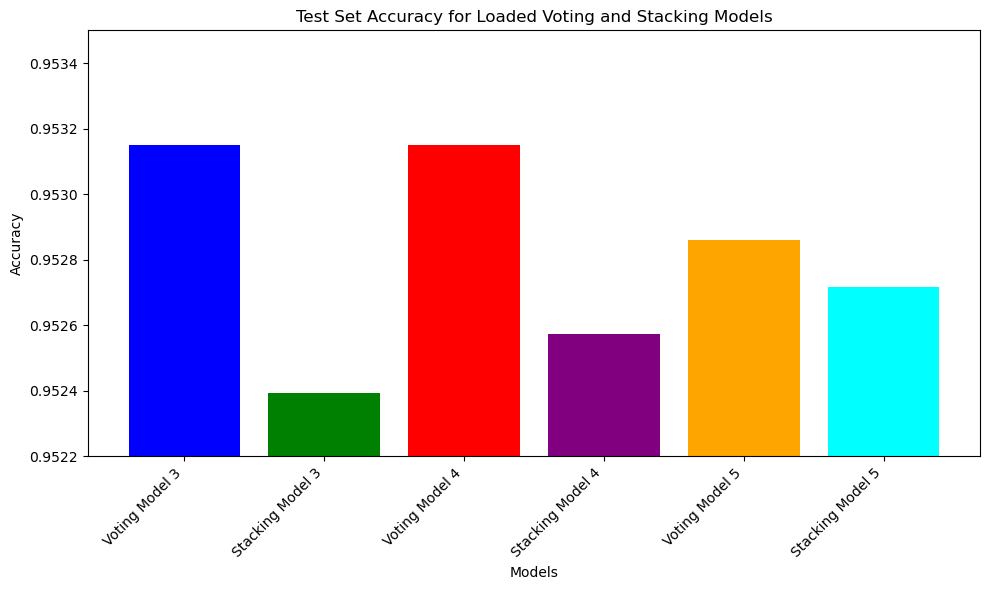

In [73]:
import matplotlib.pyplot as plt

# Accuracy values for the models
accuracies = [
    ('Voting Model 3', loaded_voting_accuracy3),
    ('Stacking Model 3', loaded_stacking_accuracy3),
    ('Voting Model 4', loaded_voting_accuracy4),
    ('Stacking Model 4', loaded_stacking_accuracy4),
    ('Voting Model 5', loaded_voting_accuracy5),
    ('Stacking Model 5', loaded_stacking_accuracy5)
]

# Extract model names and their corresponding accuracies
models = [model[0] for model in accuracies]
scores = [model[1] for model in accuracies]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Set Accuracy for Loaded Voting and Stacking Models')
plt.xticks(rotation=45, ha='right')
plt.ylim([0.9522, 0.9535])  # Accuracy is between 0 and 1
plt.tight_layout()

# Display the plot
plt.show()


In [32]:
# Create and train Voting Classifier models
voting_classifier = VotingClassifier(estimators=[
    ('rf', base_models[0]),
    ('ab', base_models_ab[0]),
    ('gb', base_models_gb[0]),
], voting='soft')
voting_classifier.fit(X_train, Y_train)


# Create and train Stacking Classifier models
stacking_classifier = StackingClassifier(estimators=[
    ('rf', base_models[0]),
    ('ab', base_models_ab[0]),
    ('gb', base_models_gb[0]),
], final_estimator=LogisticRegression())
stacking_classifier.fit(X_train, Y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('ab', AdaBoostClassifier(n_estimators=100)),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [41]:
# # Get input from the user
# user_input = {
#     'Pregnancies': float(input('Enter number of Pregnancies: ')),
#     'Glucose': float(input('Enter Glucose level: ')),
#     'BloodPressure': float(input('Enter Blood Pressure: ')),
#     'SkinThickness': float(input('Enter Skin Thickness: ')),
#     'Insulin': float(input('Enter Insulin level: ')),
#     'BMI': float(input('Enter BMI: ')),
#     'DiabetesPedigreeFunction': float(input('Enter Diabetes Pedigree Function: ')),
#     'Age': float(input('Enter Age: '))
# }

# # Convert the user input into a DataFrame
# user_df = pd.DataFrame([user_input])

# # Make a prediction using the trained model
# user_prediction = rf.predict(user_df)

# # Interpret the prediction
# if user_prediction[0] == 0:
#     result = "No diabetes"
# else:
#     result = "Diabetes"

# print(f"The model predicts: {result}")


Enter number of Pregnancies: 0
Enter Glucose level: 137
Enter Blood Pressure: 40
Enter Skin Thickness: 35
Enter Insulin level: 168
Enter BMI: 43.1
Enter Diabetes Pedigree Function: 2.288
Enter Age: 38
The model predicts: Diabetes
